# Importing the required libraries

In [323]:
import time

# For loading data and data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For cleaning the text
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For preprocessing and modelling
import tensorflow as tf

# Loading the data

In [324]:
df = pd.read_csv("twitter_tweets.csv", encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "tweet"])
df.head()

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Taking the required columns

In [325]:
required_columns = ["tweet", "target"]
df = df[required_columns]
df.head()

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


# Getting one with the data

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   tweet   1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [327]:
df.describe()

,target
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [328]:
df.shape

(1600000, 2)

# Rename the target values from 0, 4 to negative, positive

In [329]:
df['target'] = df['target'].replace([0, 4], ['negative', 'positive'])
df.head()

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


# Plot the graph to count the positive and negative sentiment tweets

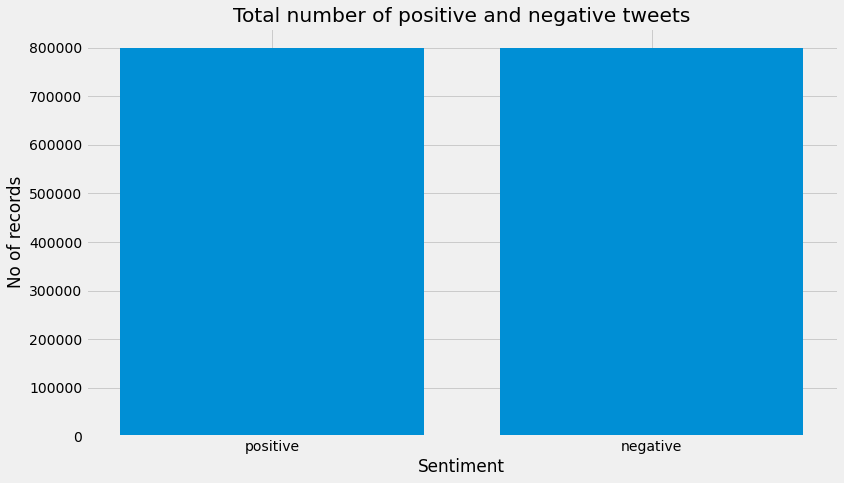

In [330]:
plt.figure(figsize=(12, 7))
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values)
plt.title('Total number of positive and negative tweets')
plt.xlabel('Sentiment')
plt.ylabel('No of records')
plt.show()

# Check for the null records and remove them

In [331]:
df.isnull().sum()

tweet     0
target    0
dtype: int64

# Check for the duplicate records and remove them

In [332]:
df[df.duplicated()]

,tweet,target
1940,and so the editing of 3000 wedding shots begins,negative
2149,"im lonely keep me company! 22 female, california",negative
3743,I'm not liking that new iTunes Pricing at all....,negative
3746,"cant eat, drink or breath properly thanks to t...",negative
4163,has a cold,negative
...,...,...
1599450,Good morning!,positive
1599501,getting used to twitter,positive
1599531,@KhloeKardashian Definitely my Mom. And Angeli...,positive
1599678,goodmorning,positive


In [333]:
df.drop_duplicates(inplace=True)

In [334]:
df.shape

(1583691, 2)

# Function to plot the graph between number of records and given column

In [335]:
def plot_count(df, col, label):
    plt.figure(figsize=(12, 7))
    plt.plot(df[col], label=label)
    plt.legend()
    plt.xlabel('Number of review')
    plt.ylabel('Count')
    plt.show()

# Counting the number of characters in each tweets

In [336]:
df['char_count'] = df['tweet'].str.len().values

In [337]:
df.head()

,tweet,target,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115
1,is upset that he can't update his Facebook by ...,negative,111
2,@Kenichan I dived many times for the ball. Man...,negative,89
3,my whole body feels itchy and like its on fire,negative,47
4,"@nationwideclass no, it's not behaving at all....",negative,111


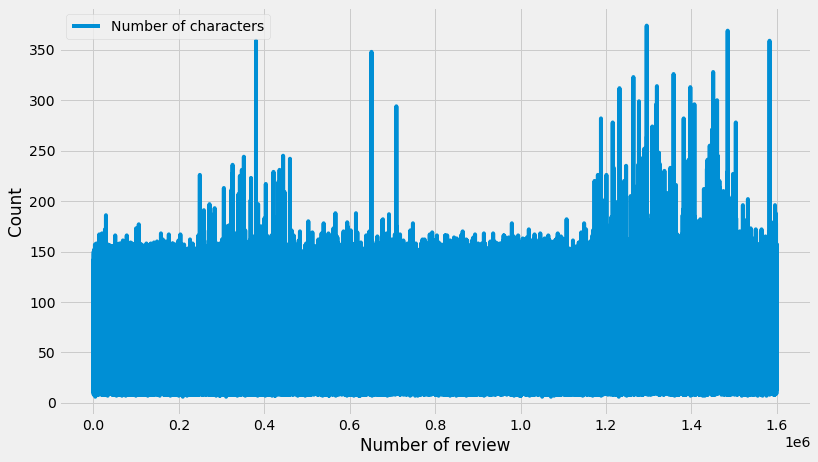

In [338]:
plot_count(df, 'char_count', 'Number of characters')

### Removing all the records that has more than 175 characters

In [339]:
df = df[df['char_count'] < 175]

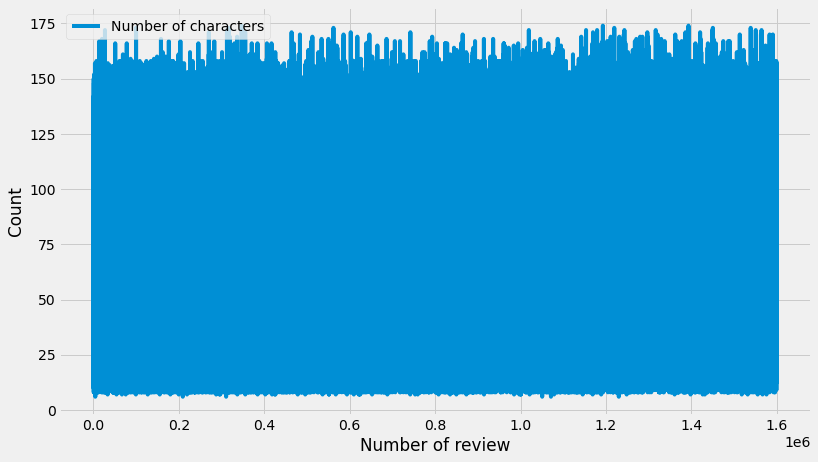

In [340]:
plot_count(df, 'char_count', 'Number of characters')

In [341]:
df.shape

(1583451, 3)

# Count the number of words in each review

In [342]:
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

In [343]:
df.head()

,tweet,target,char_count,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115,19
1,is upset that he can't update his Facebook by ...,negative,111,21
2,@Kenichan I dived many times for the ball. Man...,negative,89,18
3,my whole body feels itchy and like its on fire,negative,47,10
4,"@nationwideclass no, it's not behaving at all....",negative,111,21


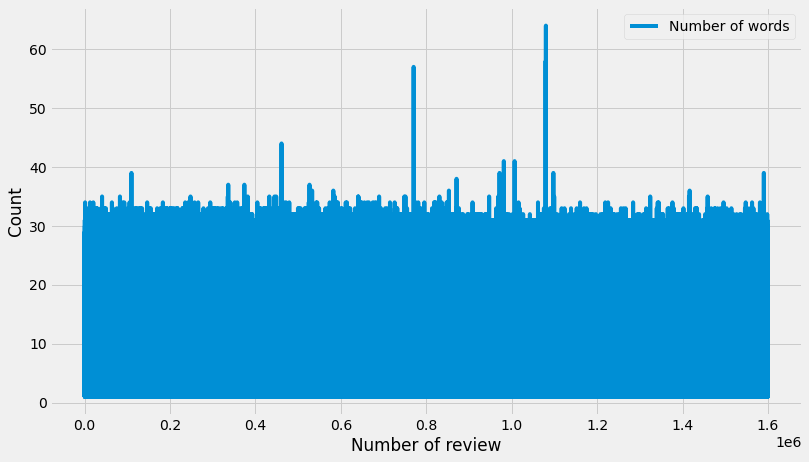

In [344]:
plot_count(df, 'word_count', 'Number of words')

### Removing all the records that has more than 35 words

In [345]:
df = df[df['word_count'] < 35]

In [346]:
df.head()

,tweet,target,char_count,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115,19
1,is upset that he can't update his Facebook by ...,negative,111,21
2,@Kenichan I dived many times for the ball. Man...,negative,89,18
3,my whole body feels itchy and like its on fire,negative,47,10
4,"@nationwideclass no, it's not behaving at all....",negative,111,21


In [347]:
df.shape

(1583410, 4)

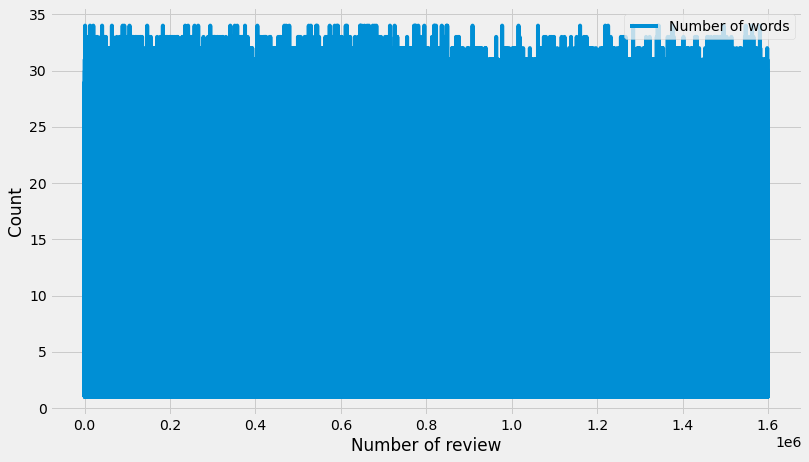

In [348]:
plot_count(df, 'word_count', 'Number of words')

# Take the sample data from all the data

In [349]:
df = df.sample(30000, random_state=42)
df = df.sample(frac=1)

In [350]:
df.reset_index(inplace=True, drop=True)

In [351]:
df.shape

(30000, 4)

# Cleaning the tweets

In [352]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

In [353]:
def cleaning(row):
    row = row.lower()
    words = tokenizer.tokenize(row)
    words = [lemmatizer.lemmatize(word.strip()) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [354]:
%%time
df['clean_tweet'] = df['tweet'].apply(cleaning)

Wall time: 6min 8s


In [355]:
df.head()

,tweet,target,char_count,word_count,clean_tweet
0,I found out just how allergic to cats I am. We...,negative,102,21,found allergic cat weird since never allergic ...
1,"YES YES finaly the weekend is here, pity about...",positive,123,24,yes yes finaly weekend pity bad weather hey fi...
2,mr ambulance you are hurting my kitties ears. ...,negative,79,14,mr ambulance hurting kitty ear hope patient ok...
3,@keith75m Up is about a little old man who fl...,positive,98,19,keith75m little old man float house away bunch...
4,.....listening to Coldplay,positive,27,3,listening coldplay


# Plot the graph to count the positive and negative sentiment tweets after sampling

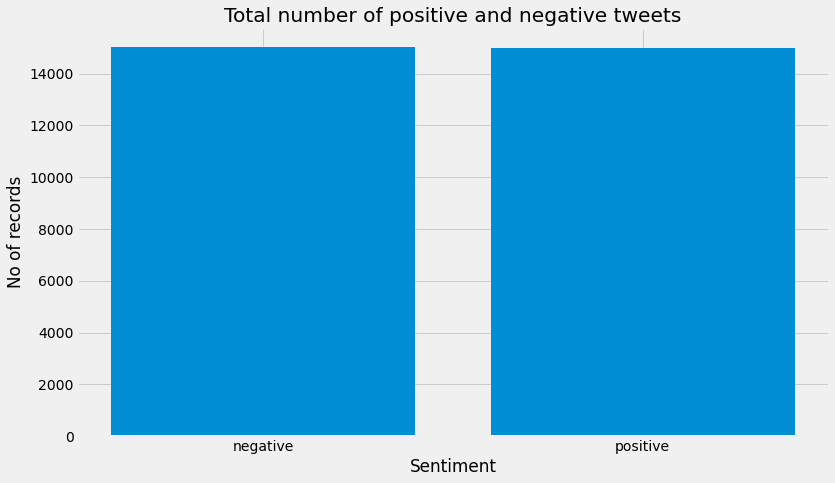

In [356]:
plt.figure(figsize=(12, 7))
plt.bar(df['target'].value_counts().index, df['target'].value_counts().values)
plt.title('Total number of positive and negative tweets')
plt.xlabel('Sentiment')
plt.ylabel('No of records')
plt.show()

In [357]:
df['target'].value_counts()

negative    15005
positive    14995
Name: target, dtype: int64

# Word count of clean tweets

In [358]:
df['clean_word_count'] = df['clean_tweet'].apply(lambda x: len(x.split()))

In [359]:
df.head()

,tweet,target,char_count,word_count,clean_tweet,clean_word_count
0,I found out just how allergic to cats I am. We...,negative,102,21,found allergic cat weird since never allergic ...,9
1,"YES YES finaly the weekend is here, pity about...",positive,123,24,yes yes finaly weekend pity bad weather hey fi...,11
2,mr ambulance you are hurting my kitties ears. ...,negative,79,14,mr ambulance hurting kitty ear hope patient ok...,9
3,@keith75m Up is about a little old man who fl...,positive,98,19,keith75m little old man float house away bunch...,10
4,.....listening to Coldplay,positive,27,3,listening coldplay,2


In [360]:
df.shape

(30000, 6)

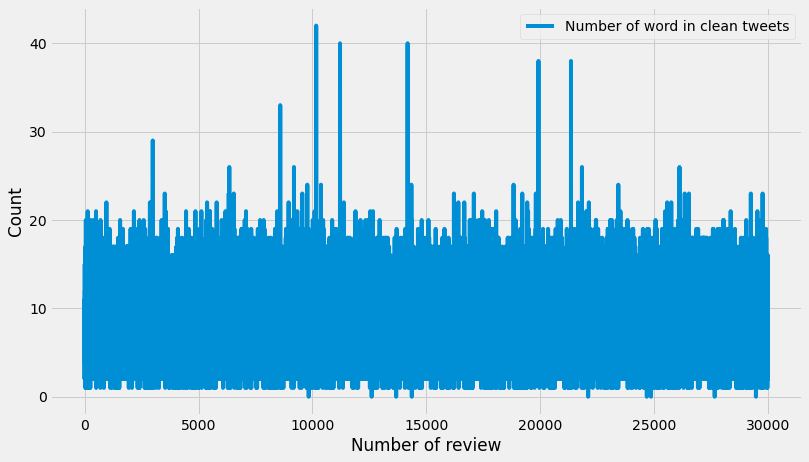

In [361]:
plot_count(df, 'clean_word_count', 'Number of word in clean tweets')

### Removing all the records that has more than 20 words and less than 3

In [362]:
df = df[df['clean_word_count'] <= 20]

In [363]:
df = df[df['clean_word_count'] >= 3]

In [364]:
df.shape

(28004, 6)

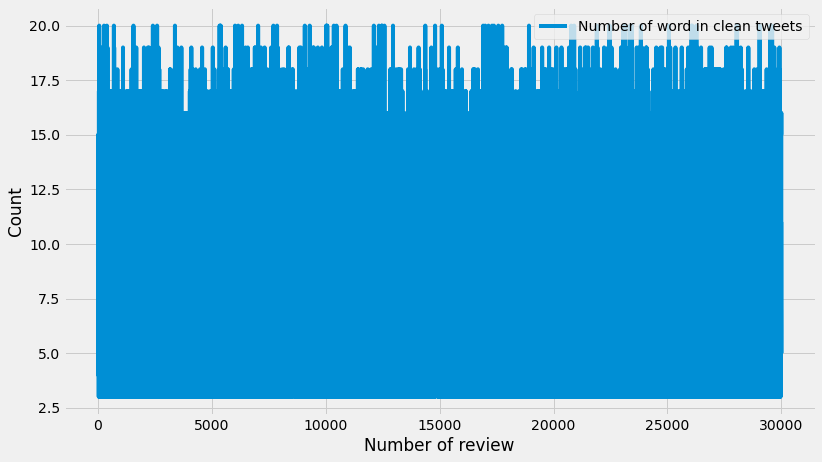

In [365]:
plot_count(df, 'clean_word_count', 'Number of word in clean tweets')

# Encode the labels using Label Encoder

In [366]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [367]:
# 1 means positive and 0 means negative
df.head()

,tweet,target,char_count,word_count,clean_tweet,clean_word_count
0,I found out just how allergic to cats I am. We...,0,102,21,found allergic cat weird since never allergic ...,9
1,"YES YES finaly the weekend is here, pity about...",1,123,24,yes yes finaly weekend pity bad weather hey fi...,11
2,mr ambulance you are hurting my kitties ears. ...,0,79,14,mr ambulance hurting kitty ear hope patient ok...,9
3,@keith75m Up is about a little old man who fl...,1,98,19,keith75m little old man float house away bunch...,10
5,lookin for a driving school just got my permit...,1,83,15,lookin driving school got permit juiced like w...,9


# Use padding to make the size of all reviews same

In [368]:
tf_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=500, split=' ')
tf_tokenizer.fit_on_texts(df['clean_tweet'].values)

In [369]:
X = tf_tokenizer.texts_to_sequences(df['clean_tweet'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='pre')

In [370]:
X

array([[  0,   0,   0, ...,  89,  37,  95],
       [  0,   0,   0, ...,  86, 118, 145],
       [  0,   0,   0, ...,  34, 209,  61],
       ...,
       [  0,   0,   0, ..., 135, 310, 271],
       [  0,   0,   0, ...,  97,  34,  65],
       [  0,   0,   0, ...,  63, 153, 335]])

In [371]:
X.shape

(28004, 18)

In [372]:
padding_len = X.shape[1]

# Splitting data into train and test

In [373]:
y = pd.get_dummies(df['target'])

In [374]:
y.head()

,0,1
0,1,0
1,0,1
2,1,0
3,0,1
5,0,1


In [376]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19602, 18), (8402, 18), (19602, 2), (8402, 2))

# Creating Sequential model and train it

In [377]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 120, input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.LSTM(176, dropout=0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [378]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 18, 120)           1200000   
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 18, 120)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 176)               209088    
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 354       
Total params: 1,409,442
Trainable params: 1,409,442
Non-trainable params: 0
_________________________________________________________________


In [379]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose='auto')

Epoch 1/25
613/613 [==============================] - 8s 10ms/step - loss: 0.5885 - accuracy: 0.6782
Epoch 2/25
613/613 [==============================] - 6s 10ms/step - loss: 0.5485 - accuracy: 0.7149
Epoch 3/25
613/613 [==============================] - 6s 10ms/step - loss: 0.5379 - accuracy: 0.7250
Epoch 4/25
613/613 [==============================] - 6s 10ms/step - loss: 0.5308 - accuracy: 0.7285
Epoch 5/25
613/613 [==============================] - 7s 12ms/step - loss: 0.5232 - accuracy: 0.7339
Epoch 6/25
613/613 [==============================] - 9s 14ms/step - loss: 0.5162 - accuracy: 0.7345
Epoch 7/25
613/613 [==============================] - 7s 12ms/step - loss: 0.5102 - accuracy: 0.7407
Epoch 8/25
613/613 [==============================] - 8s 12ms/step - loss: 0.5029 - accuracy: 0.7420
Epoch 9/25
613/613 [==============================] - 8s 13ms/step - loss: 0.4955 - accuracy: 0.7472
Epoch 10/25
613/613 [==============================] - 7s 12ms/step - loss: 0.4897 - accura

### Plot the history

<AxesSubplot:>

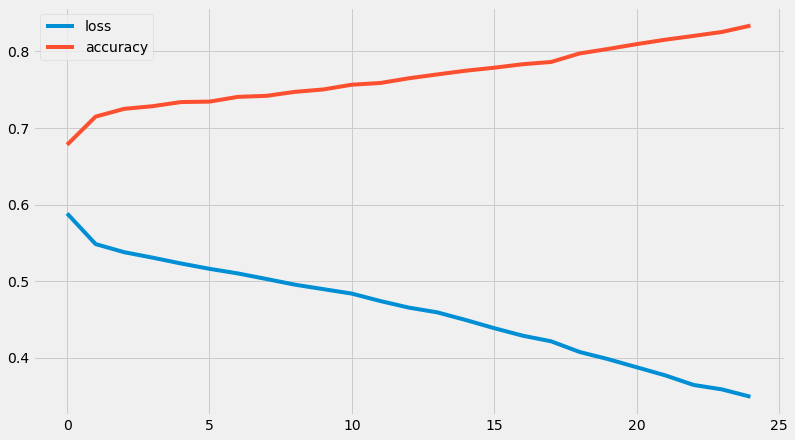

In [385]:
pd.DataFrame(history.history).plot(figsize=(12,7))

### Evaluate the model

In [386]:
model.evaluate(X_test, y_test)

263/263 [==============================] - 1s 5ms/step - loss: 0.8058 - accuracy: 0.6681


[0.8058484196662903, 0.6680552363395691]

# Pipeline to predict the sentiment of the raw tweet

In [387]:
def pipeline(model, tweet):
    df_pipe = pd.DataFrame({'tweet': [tweet]})
    df_pipe['clean_tweet'] = df_pipe['tweet'].apply(cleaning)
    
    X = tf_tokenizer.texts_to_sequences(df_pipe['clean_tweet'].values)
    X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=padding_len, padding='pre')

    [[negative, positive]] = model.predict(X)
    
    sentiment = ""
    if positive > negative:
        sentiment = "positive"
    else: 
        sentiment = "negative"
        
    return positive, negative, sentiment

In [390]:
pipeline(model, "I like the overall movie but some scenes are just not so good")

(0.5853117, 0.41468832, 'positive')